# RANDOM FOREST

In [1]:
# importing necessary liberaries
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
# setting parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 250
# to ignnore warninngs
import warnings
warnings.filterwarnings('ignore')

# for model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_excel('glass.xlsx',sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
# Prepare a model for glass classification using Random Forest
# Data Description:
# RI : refractive index
# Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
# Mg: Magnesium
# AI: Aluminum
# Si: Silicon
# K:Potassium
# Ca: Calcium
# Ba: Barium
# Fe: Iron

# Type: Type of glass: (class attribute)
#  1 -- building_windows_float_processed
#  2 --building_windows_non_float_processed
#  3 --vehicle_windows_float_processed
#  4 --vehicle_windows_non_float_processed (none in this database)
#  5 --containers
#  6 --tableware
#  7 --headlamps

In [4]:
# descriptive statistics 
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


##### OBSERVATION
    ## there is no missing values
    ## most of the columns are skewed positively

In [5]:
# checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
# all the columns are having proper datatype

In [7]:
# LIST OF COLUMNS

col_names = df.columns
col_names

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [8]:
# unique values in the columns
for col in col_names:
    print(f'{col} has {df[col].nunique()} unique values: ')
    print(df[col].unique())
    print('--' * 40)

RI has 178 unique values: 
[1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851

In [9]:
# unique values in the target column(Type )
df.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

type 4 glass is not present in the dataset

In [10]:
# frequecy of values
df.Type.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [11]:
# dataset is imbalance
# because type 5 and 6 classes categories are present in very less numbers

# EDA

In [12]:
# checking missing values
print(f' missing values:')
df.isna().sum()

 missing values:


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [13]:
# checking duplicated values
print(f'there are {df.duplicated().sum()} duplicated values:')

there are 1 duplicated values:


In [14]:
# removing duplicate
df.drop_duplicates(inplace=True)

In [15]:
# checking duplicated values
print(f'now there are {df.duplicated().sum()} duplicated values:')

now there are 0 duplicated values:


In [16]:
# shape of data
df.shape

(213, 10)

# VISUALIZATION

In [17]:
# understanding the distribution of the columns

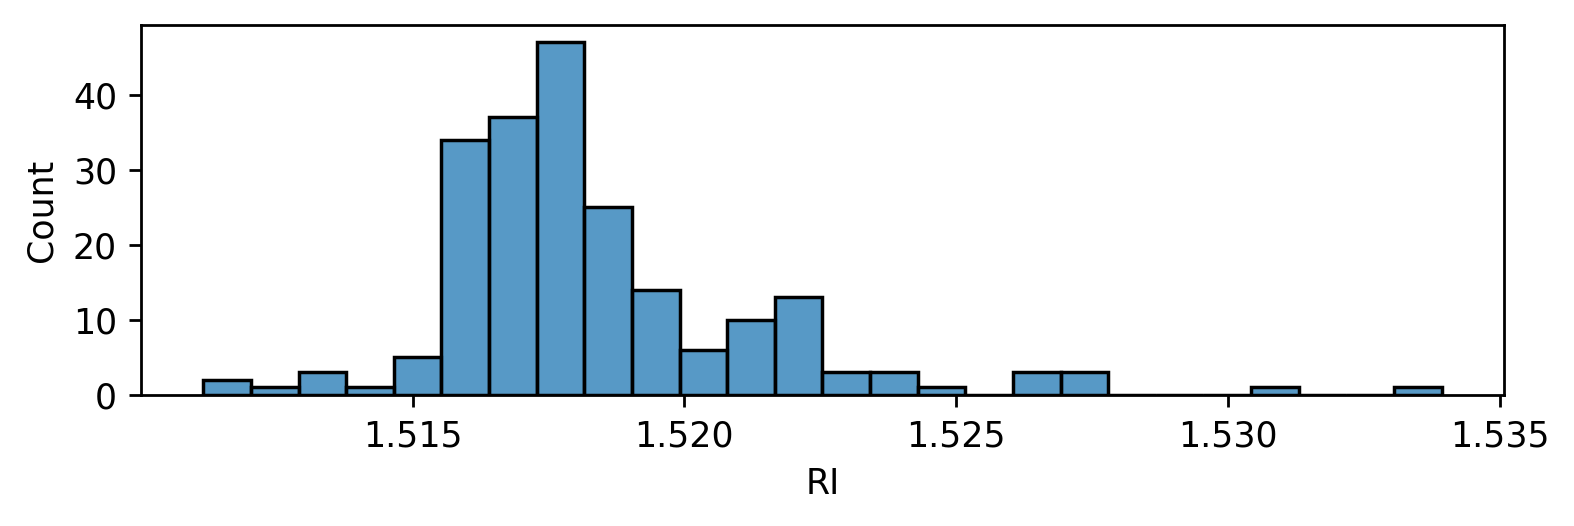

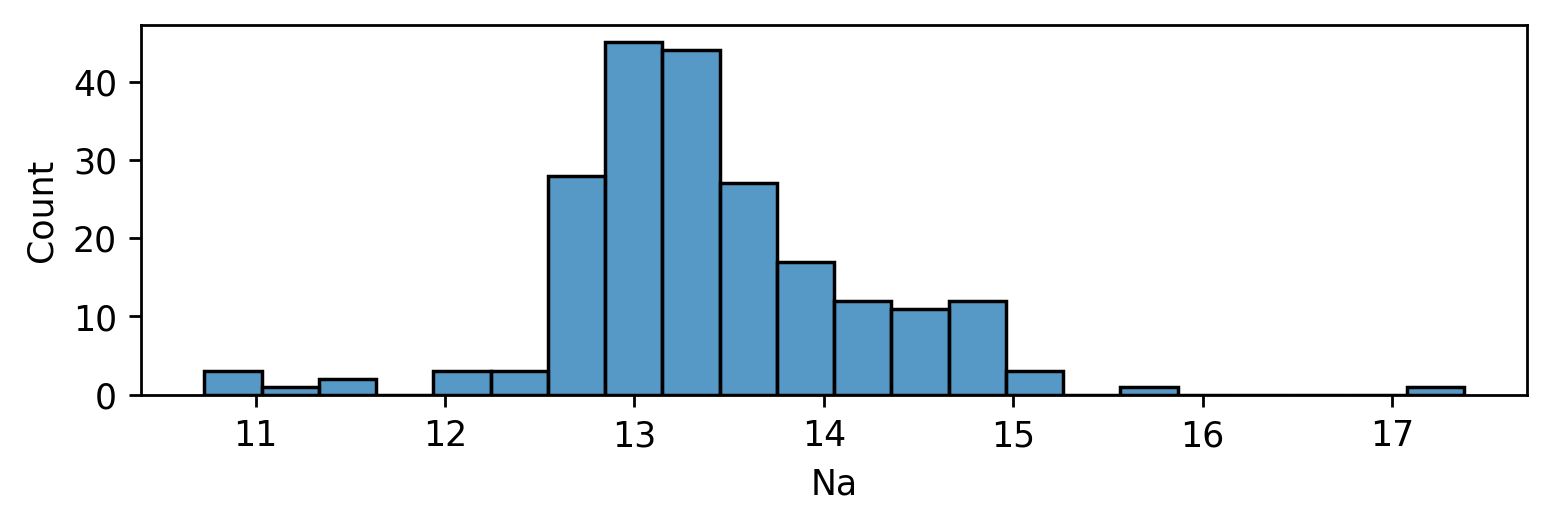

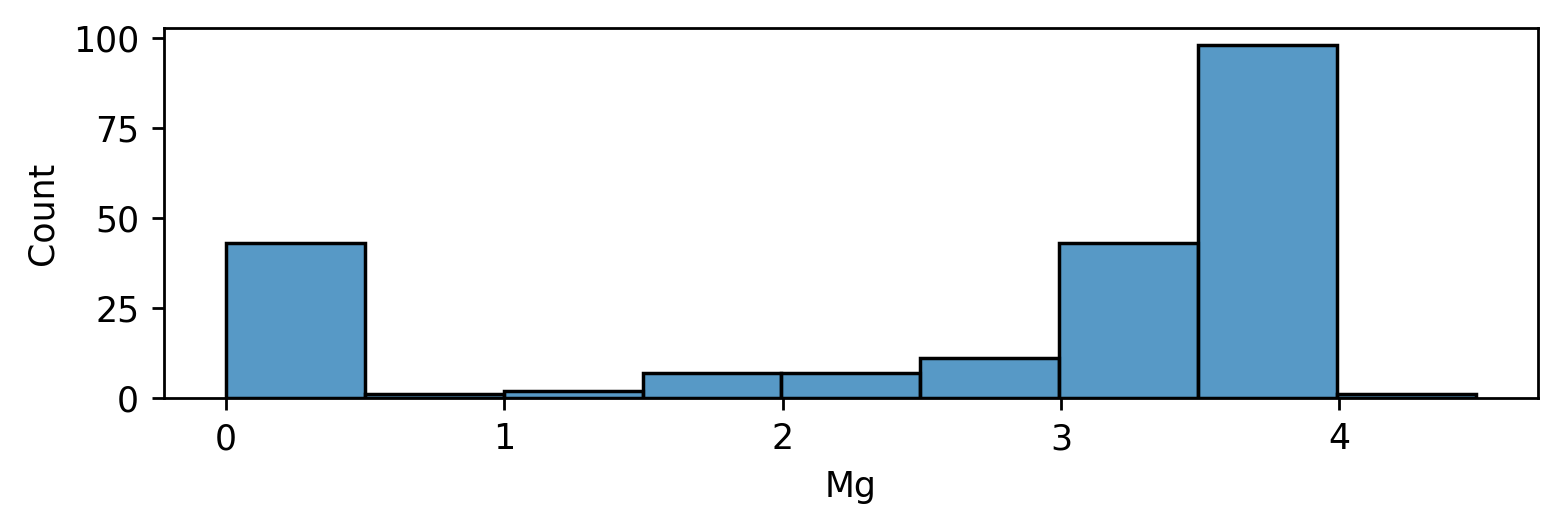

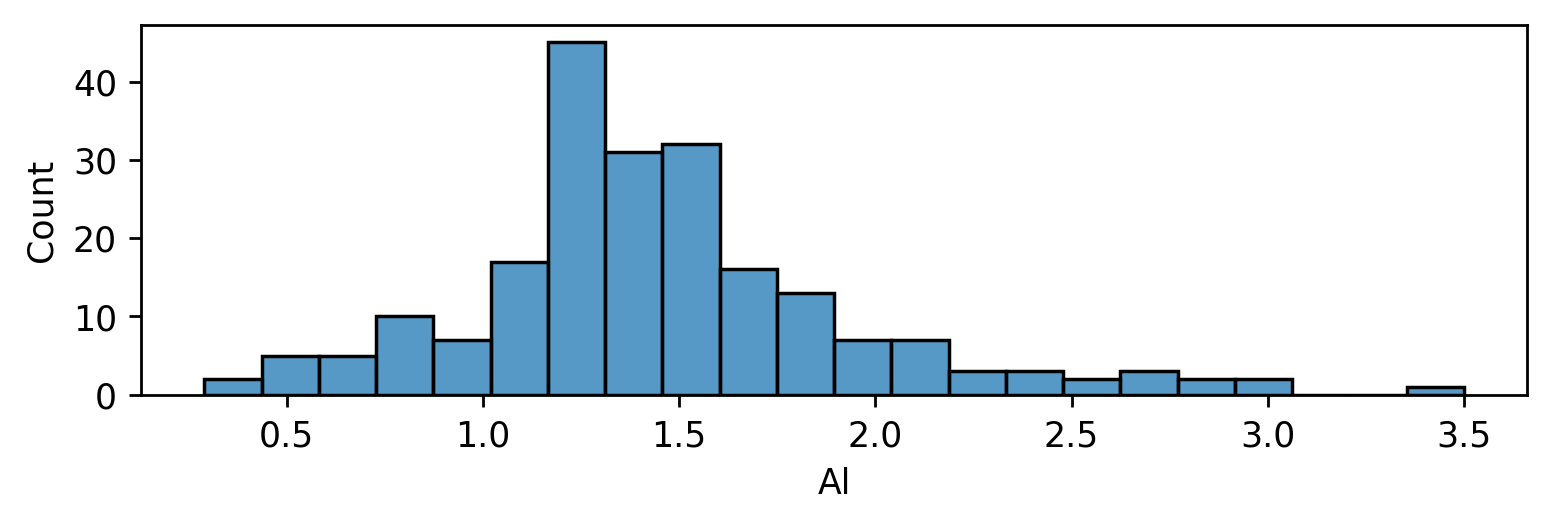

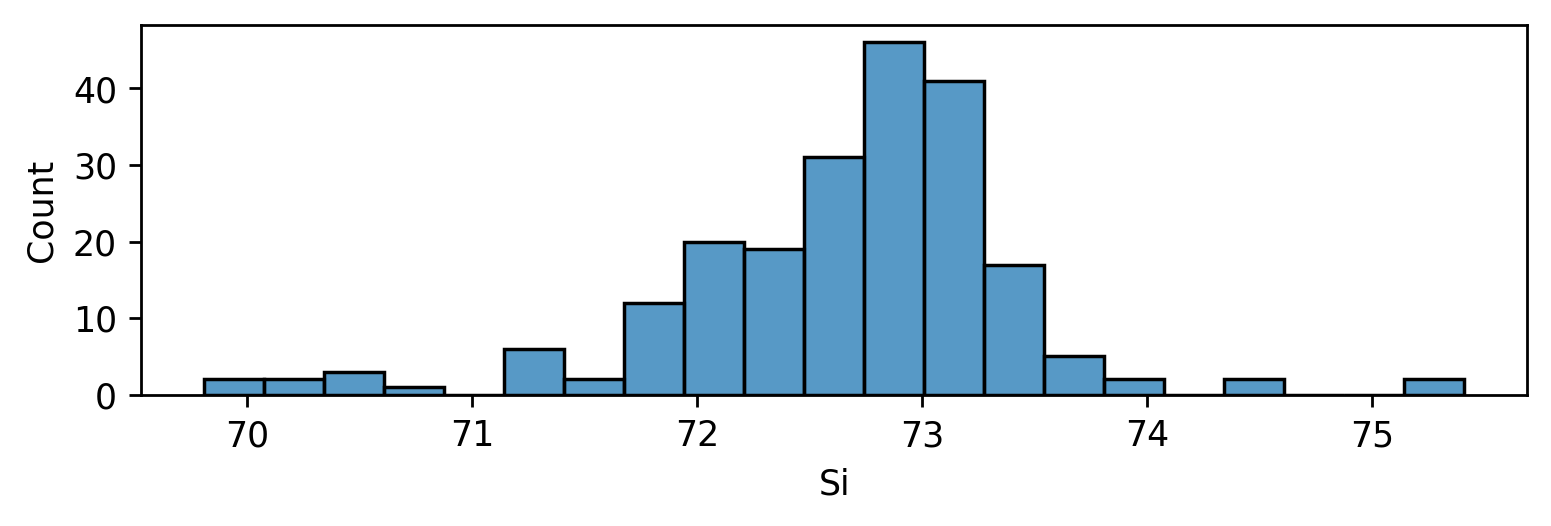

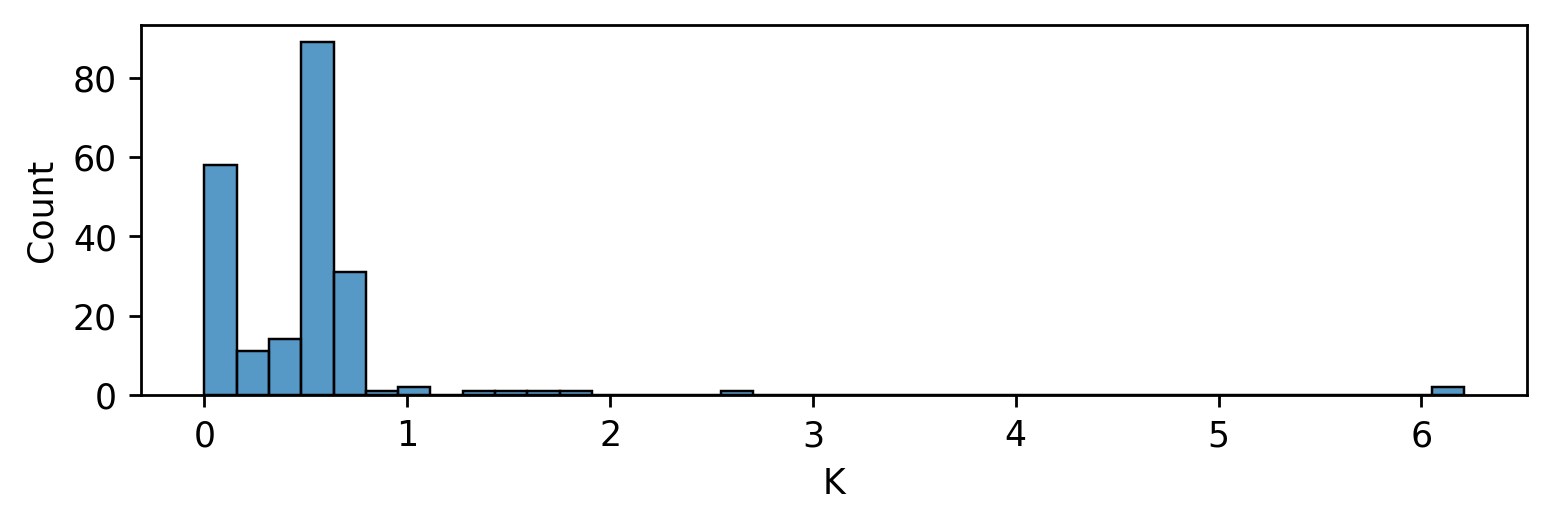

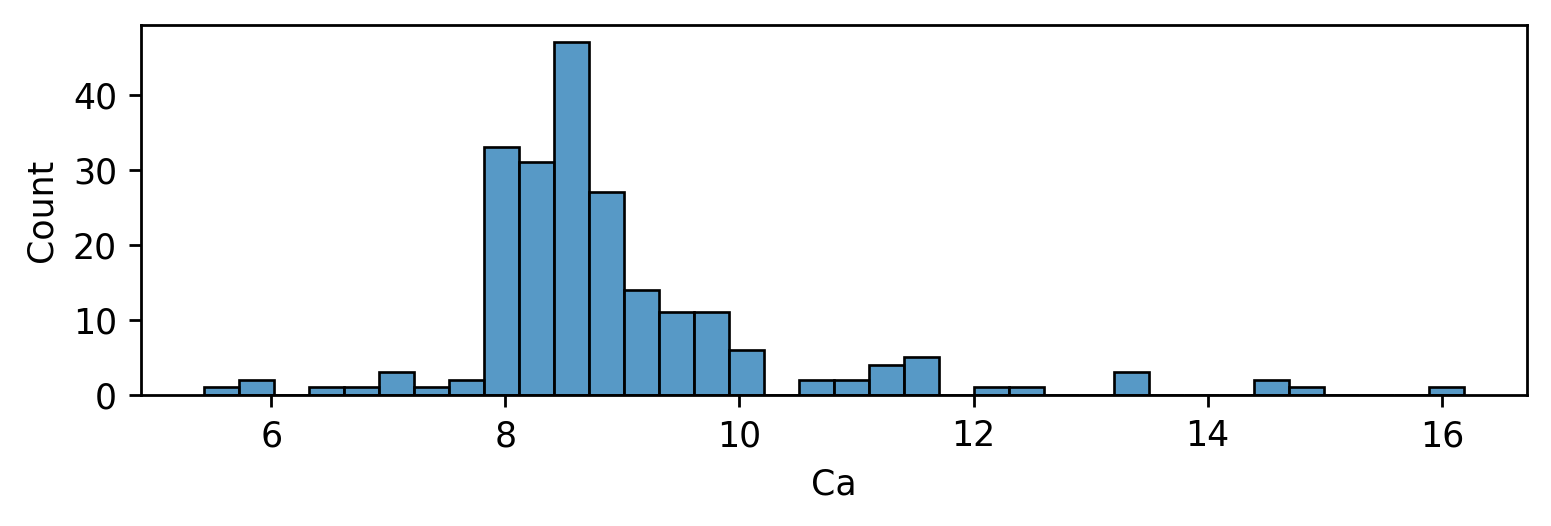

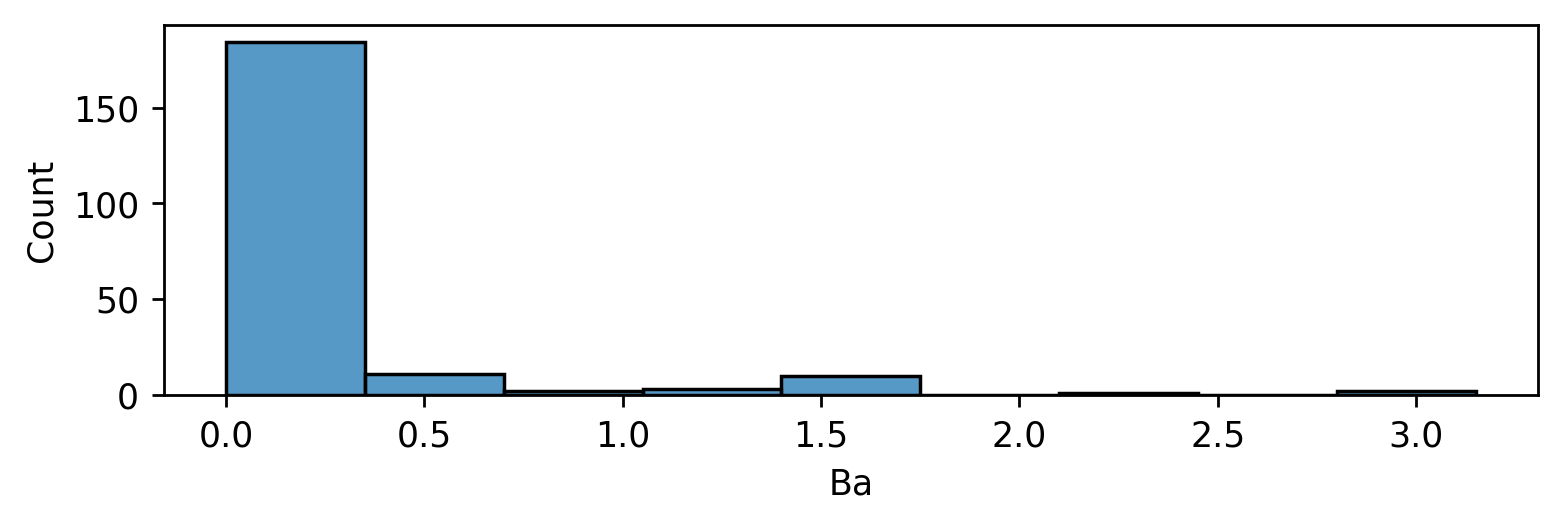

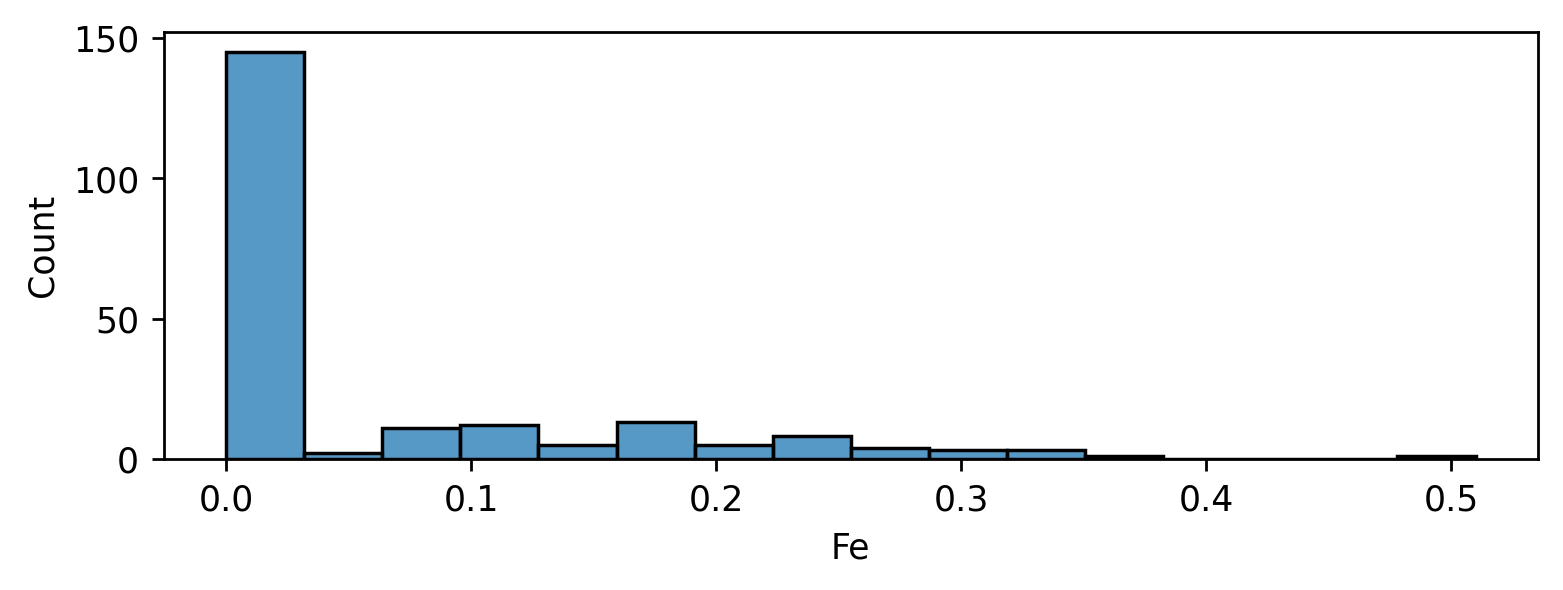

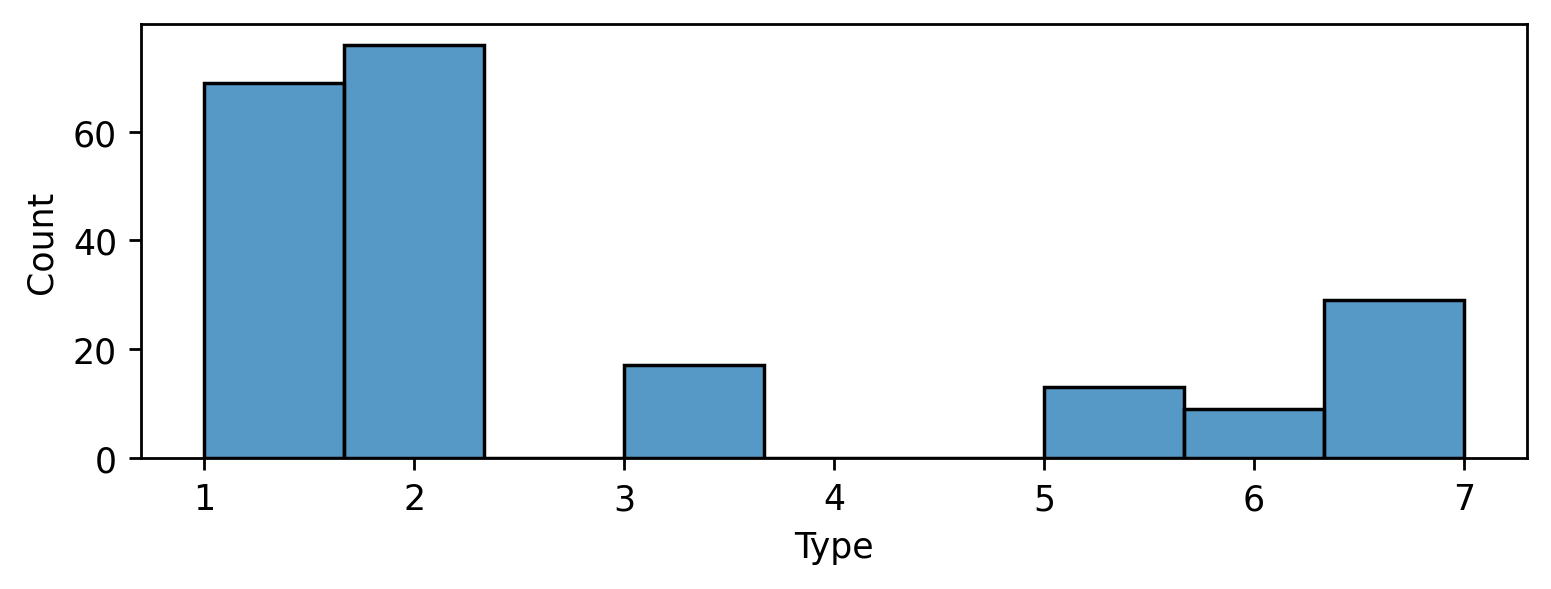

In [18]:
for i, col in enumerate(col_names):
    plt.rcParams['figure.figsize'] = (12, 10)
    plt.subplot(5, 2, i+1)
    sns.histplot(df[col])
    plt.tight_layout()
    plt.xlabel(col)
    plt.show()

In [19]:
# we can see that most of the column are having outliers

# OUTLIERS

<Axes: >

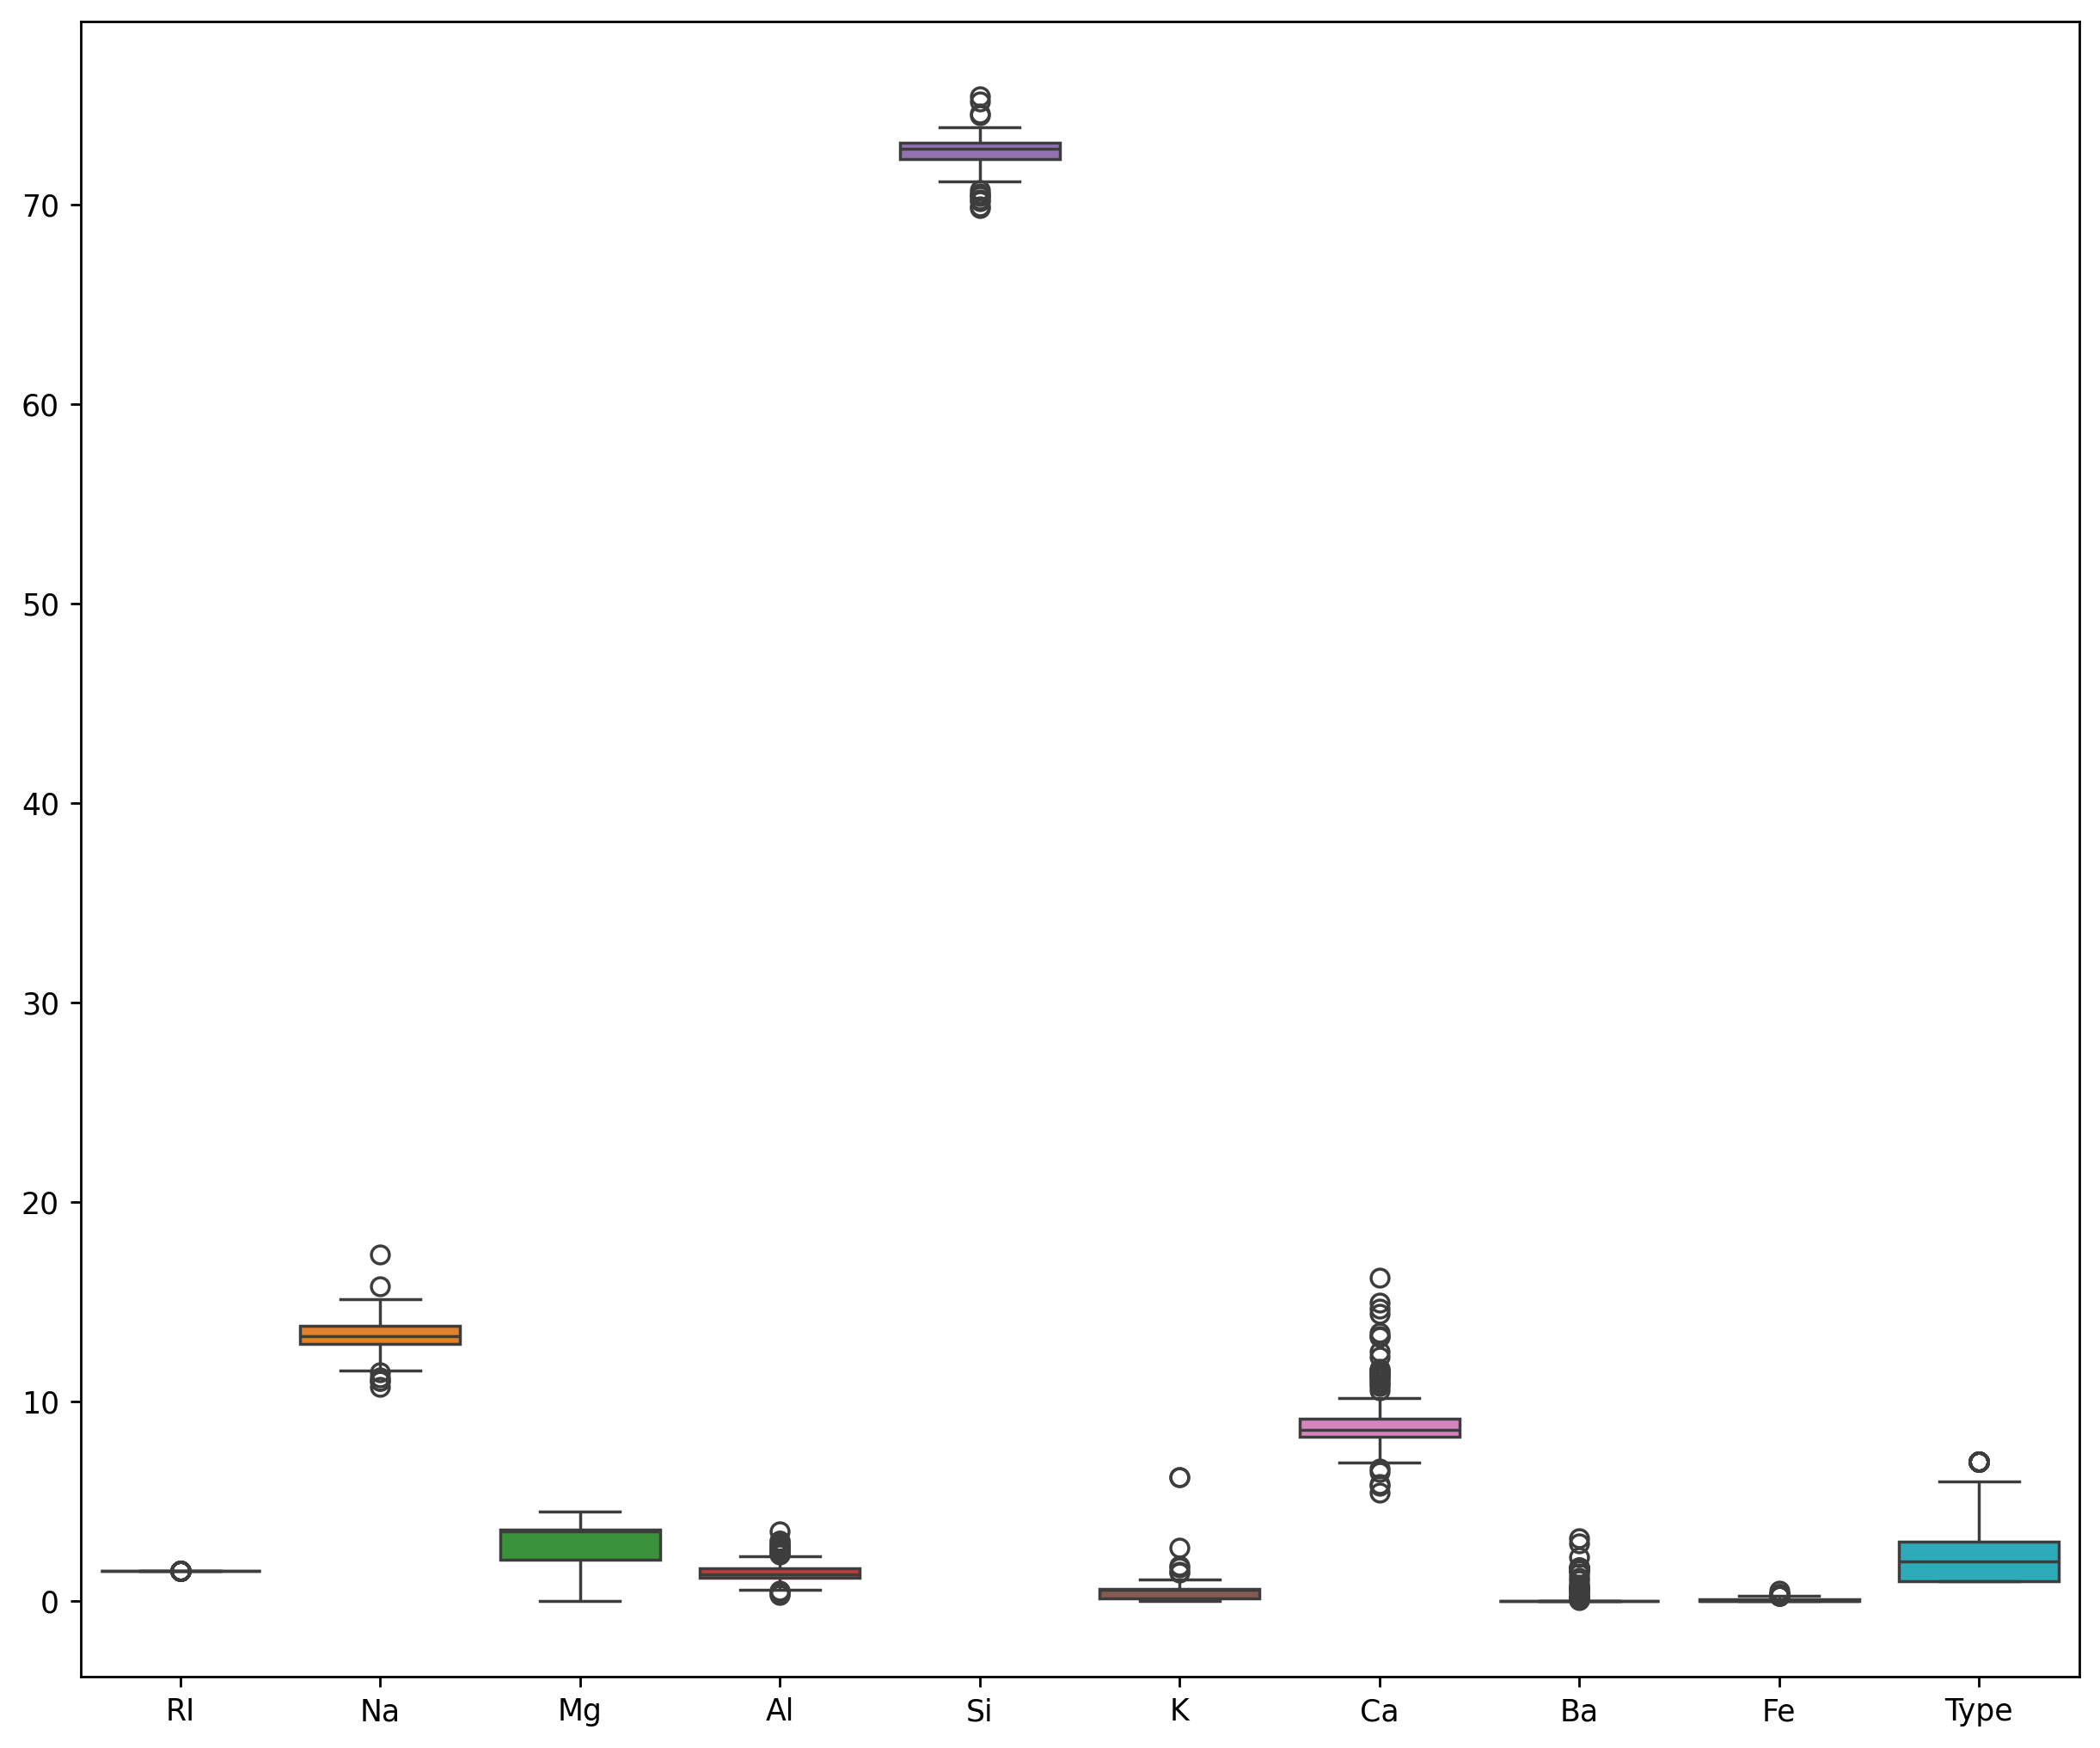

In [20]:
# BOXPLOT
sns.boxplot(df)

# dealing with the outliers


In [21]:
# defining function of outliers capping
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        lower = q1 - (1.5 * IQR)
        upper = q3 + (1.5 * IQR)
        data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower, data[col]))           #capping outliers

In [22]:
# capping the outliers

capping(df, df.columns)

<Axes: >

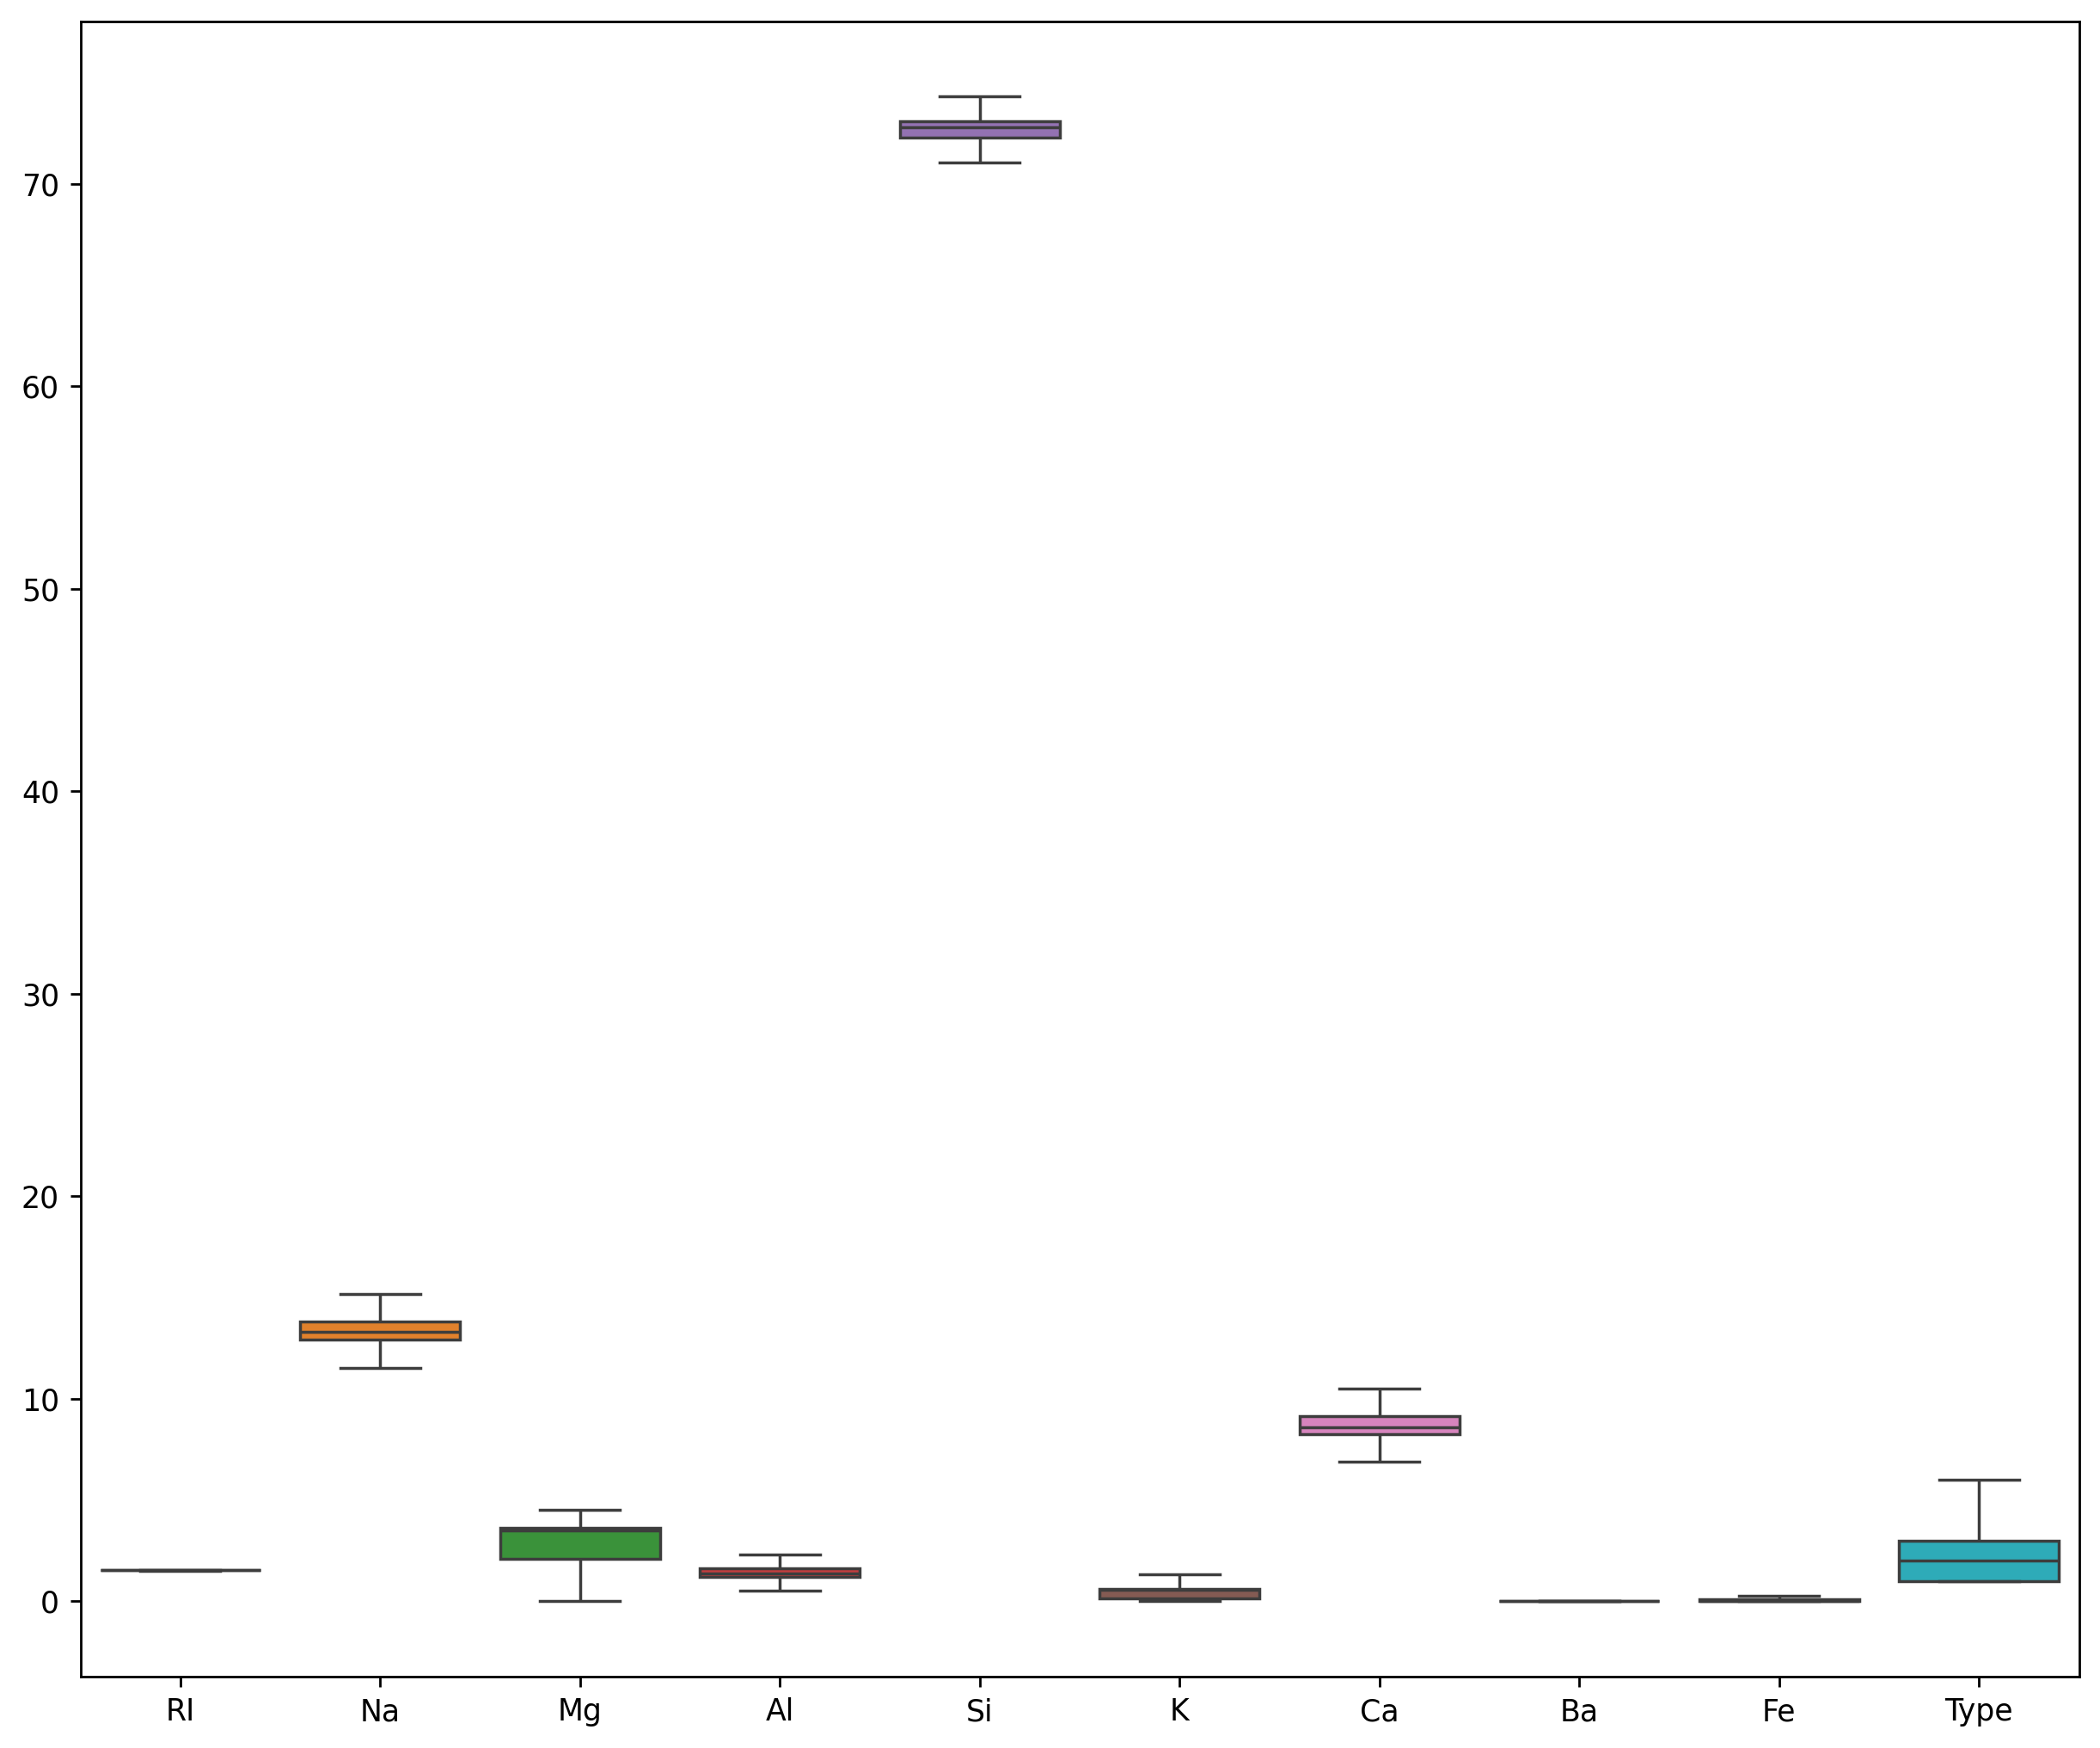

In [23]:
# confirming outliers

sns.boxplot(df)

In [24]:
# ALTHOUGH I HAVE CAPPED OUTLIERS BUT:

# outliers are providing useful information so they should not be removed or capped
# because there are some type of glasses wherein a perticular element is need in higer amount in comparision to other types of glasses
# If I remove them then I will not be good thing because a perticular amount of element is necessary of a special type of glass

# MODEL

In [25]:
# defining x and y variables

x = df.drop(columns='Type')
y = df['Type']
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0


In [26]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
209    6.0
210    6.0
211    6.0
212    6.0
213    6.0
Name: Type, Length: 213, dtype: float64

In [27]:
# splitting data in training and testing

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.80, random_state=41)
xtrain

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
50,1.523095,13.72,3.72,0.53,71.75,0.09,10.06,0.0,0.16
42,1.517790,13.21,3.39,1.33,72.76,0.59,8.59,0.0,0.00
55,1.517690,12.45,2.71,1.29,73.70,0.56,9.06,0.0,0.24
117,1.517080,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00
102,1.518200,12.62,2.76,0.83,73.81,0.35,9.42,0.0,0.20
...,...,...,...,...,...,...,...,...,...
66,1.521520,13.05,3.65,0.87,72.22,0.19,9.85,0.0,0.17
81,1.515930,13.25,3.45,1.43,73.17,0.61,7.86,0.0,0.00
141,1.518510,13.20,3.63,1.07,72.83,0.57,8.41,0.0,0.17
164,1.519150,12.73,1.85,1.86,72.69,0.60,10.09,0.0,0.00


In [28]:
ytrain

50     1.0
42     1.0
55     1.0
117    2.0
102    2.0
      ... 
66     1.0
81     2.0
141    2.0
164    5.0
193    6.0
Name: Type, Length: 170, dtype: float64

In [29]:
# model building

model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [30]:
# getting predictiomn
ypred = model.predict(xtest)
ypred

array([6., 2., 6., 1., 1., 6., 2., 6., 2., 1., 6., 1., 1., 2., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 2., 6., 1., 2., 2., 3., 1., 6., 2., 5., 6.,
       2., 1., 6., 3., 1., 1., 2., 1., 3.])

# MODEL EVALUATION

In [31]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         1.0       0.83      1.00      0.91        15
         2.0       0.92      0.73      0.81        15
         3.0       1.00      0.60      0.75         5
         5.0       0.00      0.00      0.00         1
         6.0       0.78      1.00      0.88         7

    accuracy                           0.84        43
   macro avg       0.71      0.67      0.67        43
weighted avg       0.85      0.84      0.83        43



In [32]:
# model is giving 84% accuracy

# DEALING WITH THE IMBALANCED DATASET

In [33]:
# using balanced random forest classifier

In [34]:
# model building
balanced_model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
balanced_model.fit(xtrain, ytrain)

BalancedRandomForestClassifier(random_state=42)

In [35]:
# getting prediction
predict = balanced_model.predict(xtest)
predict

array([6., 2., 6., 3., 3., 6., 2., 6., 3., 1., 6., 3., 1., 5., 3., 3., 1.,
       2., 1., 2., 1., 1., 3., 1., 6., 3., 1., 2., 3., 1., 6., 3., 5., 6.,
       2., 1., 6., 3., 1., 3., 5., 1., 3.])

In [36]:
# EVALUATION
print(classification_report(ytest, predict))

              precision    recall  f1-score   support

         1.0       0.75      0.60      0.67        15
         2.0       1.00      0.40      0.57        15
         3.0       0.38      1.00      0.56         5
         5.0       0.33      1.00      0.50         1
         6.0       0.78      1.00      0.88         7

    accuracy                           0.65        43
   macro avg       0.65      0.80      0.63        43
weighted avg       0.79      0.65      0.65        43



In [37]:
kf = KFold(n_splits=5)

In [38]:
# it is giving me 65 % accuracy which is quiet good because the dataset is very small and it is balancing the dataset also

# APPLYING BOOSTING ALGORITHM TO SEE THE DIFFERENCE

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gb = GradientBoostingClassifier()
gb.fit(xtrain, ytrain)
pred = gb.predict(xtest)
pred

array([6., 2., 6., 1., 1., 6., 2., 6., 3., 1., 6., 1., 1., 2., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 2., 6., 1., 2., 2., 3., 1., 6., 2., 5., 6.,
       2., 1., 6., 1., 1., 1., 5., 1., 3.])

In [41]:
# model evaluaiton 
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

         1.0       0.79      1.00      0.88        15
         2.0       0.90      0.60      0.72        15
         3.0       0.67      0.40      0.50         5
         5.0       0.00      0.00      0.00         1
         6.0       0.78      1.00      0.88         7

    accuracy                           0.77        43
   macro avg       0.63      0.60      0.60        43
weighted avg       0.79      0.77      0.76        43



In [42]:
# it is giving me 77 % accuracy

# COMPARISION BETWEEN BAGGING AND BOOSTING ALGORITHMS:


In [43]:
# On this dataset
# BAGGINBG model is giving 84% accuracy

# BOOSTING model is giving 77 % accuracy 

# INTERVIEW QUESTIONS

In [44]:
# Additional Notes:
# 1. Explain Bagging and Boosting methods. How is it different from each other.

# Bagging
# . bagging is also called bootstrap aggregation.
# . bagging combines multiple homogeneous weak learner to build a strong learner.
# . bagging model are independent of each other and they are trained simulteneously.
# . random forest is the bagging algorithm.


# Boosting
# . boosting is also having multiple homogeneous weak learners, it combines these weak learner to get a strong learner.
# . boosting model are dependent of each other and they are not trained simulteneously.
# . boosting algorithms are dependent on each other for their output and as training proceeds rate of error gets reduced by each model subsequently.
# . gradient boositng and xgboost are the boosting algorithms.




# 2. Explain how to handle imbalance in the data.

# Oversampling: Increase the number of instances in the minority class.
# Undersampling: Decrease the number of instances in the majority class.
# SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class(classes which are present in less quantity).
# Class Weights: Adjust the model to give more importance to the minority class by altering class weights.
# Ensemble Methods: Techniques like Balanced Random Forest or Easy Ensemble that are designed to handle imbalances.